
**Data Science and Business Analytics #GRIPJANUARY22**

_**Task 1: Prediction using Supervised Machine Learning
Problem Statement: Predict the percentage of marks of a student based on the number of study hours.
                   What will be the predicted score if a student studies for 9.25 hours/day?**_

In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression model as it involves just two variables.

-Author: Akansha Kumari

In [40]:
# Importing libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [41]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Given Data is:")
# Printing first 10 rows of dataframe
data.head(10)

Given Data is:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [42]:
#checking the shape of the data i.e, no. of rows and columns
data.shape

(25, 2)

In [43]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [44]:
#To know more about our dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualizing Data**


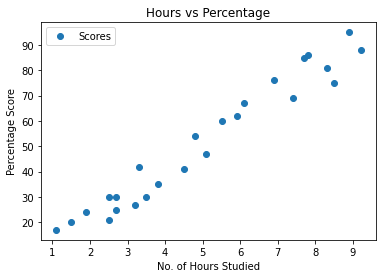

In [45]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression line')

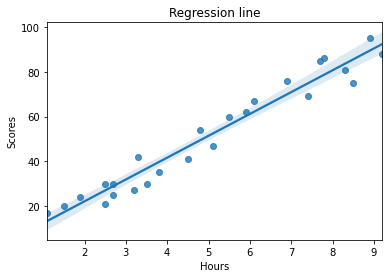

In [46]:
import seaborn as sns
sns.regplot(data["Hours"], data["Scores"],data) #y is the dependent variable
plt.title('Regression line')

#straight line is the predicted score and the dots are the actual points

**Preparing the data**

_The next step is to divide the data into attributes and labels._

In [47]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [48]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

**Training the Algorithm**

_We have split our data into training and testing sets, and now is finally the time to train our algorithm._

In [49]:
from sklearn.linear_model import LinearRegression  
smodel = LinearRegression()  
smodel.fit(X_train, y_train) 


LinearRegression()

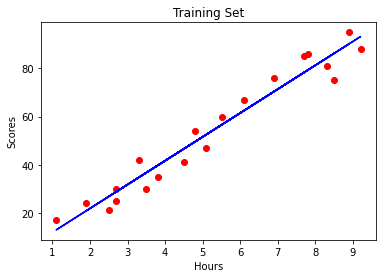

In [50]:
#plot the training set  
plt.scatter(X_train,y_train,color = "red")
#plotting the regression line
plt.plot(X_train,smodel.predict(X_train),color = "blue")
plt.title("Training Set")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

**Making Predictions**

_Now that we have trained our algorithm, it's time to make some predictions._

In [51]:
print(X_test) # Testing data - In Hours
y_pred = smodel.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [52]:
# Comparing Actual vs Predicted Values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
# test with given data

hours = [[9.25]]
own_pred = smodel.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


**_Therefore, According to our linear regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks._**

_Evaluating the model_

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For Evaluation of the Regression Model, Sklearn module provide many metrics. We are going to use these metrics to evaluate our model:
- Mean absolute error
- Mean squared error 
- Root mean squared error 

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error =', mean_absolute_error(y_test, y_pred))
print("Mean Squared Error= ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error = 4.183859899002975
Mean Squared Error=  21.5987693072174
Root Mean Squared Error=  4.6474476121003665


**_Thank you!!_**